In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# Define the transformation to convert images to PyTorch tensors
transform = transforms.Compose([transforms.ToTensor()])

### MNIST dataset

In [5]:
# Load the MNIST dataset with the specified transformation
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 9912422/9912422 [00:08<00:00, 1183944.70it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 28881/28881 [00:00<00:00, 134612.57it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 1648877/1648877 [00:01<00:00, 947771.75it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 4542/4542 [00:00<00:00, 4564094.10it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
# Flatten the images for sklearn MLP
X_train = train_dataset.data.numpy().reshape((len(train_dataset), -1))
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape((len(test_dataset), -1))
y_test = test_dataset.targets.numpy()

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
print(len(y_train))
print(len(y_test))

60000
10000


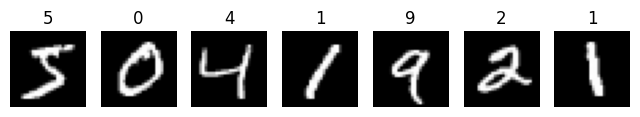

In [8]:
fig, axs = plt.subplots(1, 7, figsize=(8, 10))
for i in range(7):
    axs[i].imshow(X_train[i].reshape((28, 28)), cmap='gray')
    axs[i].set_title(y_train[i])
    axs[i].axis('off')

In [9]:
# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=20, random_state=42)

In [32]:
y_probabilities = mlp_model.predict_proba(X_test_scaled)
y_pred_mlp = mlp_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_mlp) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.35%


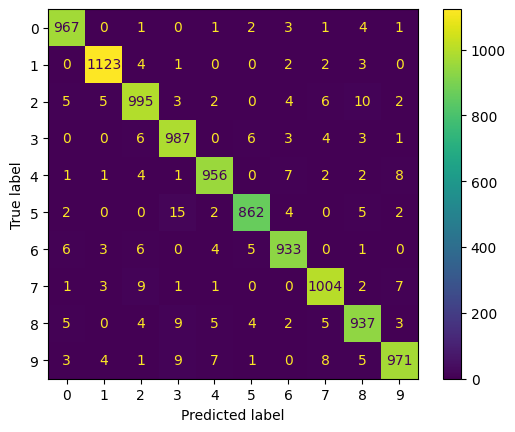

In [11]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.05%


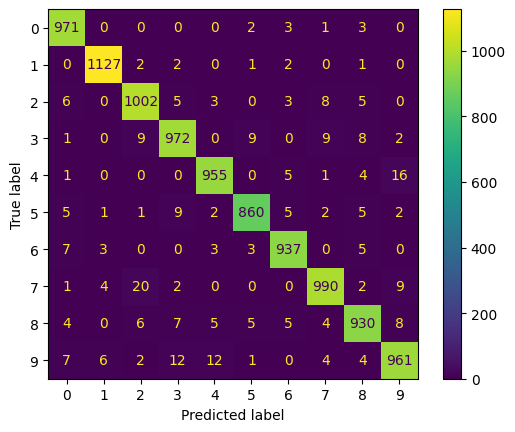

In [14]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [15]:
lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
accuracy = accuracy_score(y_test, y_pred_lr) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 92.09%


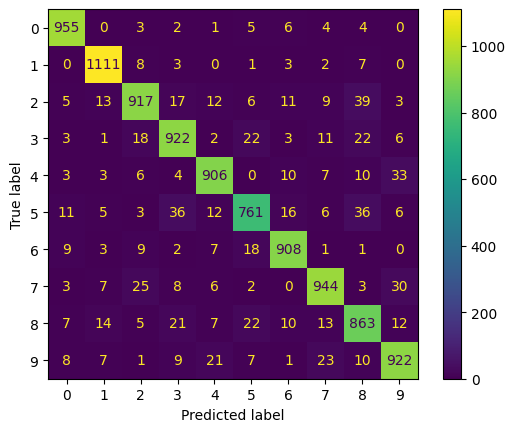

In [17]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In [18]:
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"MLP F1 Score: {f1_mlp}")
print(f"Random Forest F1 Score: {f1_rf}")
print(f"Logistic Regression F1 Score: {f1_lr}")

MLP F1 Score: 0.9734910105932999
Random Forest F1 Score: 0.9704722695987773
Logistic Regression F1 Score: 0.9206972908522326


Although we dont see a lot of confusion, and the accuacy is also very high (97.35%).

Still logically, one can say that the pair of digits, 1 and 7, 4 and 9, and 2 and 9, can be confused by a model. Especially in case when cursive writing would be used.

The confusion matrix does show that 4 and 9 are often confused, higher than the rest. 2 and 7 are also confused a lot by the models.

5 and 3 are also sometimes confused by the model probably due to their similar curves.

### MLP Model

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the MLP architecture
class MLP_30_20(nn.Module):
    def __init__(self):
        super(MLP_30_20, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)  # First layer with 30 neurons
        self.fc2 = nn.Linear(30, 20)     # Second layer with 20 neurons
        self.fc3 = nn.Linear(20, 10)     # Output layer with 10 neurons

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x_20 = torch.relu(self.fc2(x))
        x = self.fc3(x_20)
        return x, x_20

model_30_20 = MLP_30_20()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_30_20.parameters(), lr=0.001)

n_epochs = 5

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

for epoch in range(n_epochs):
    model_30_20.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs, _ = model_30_20(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader)}')

Epoch 1/5, Loss: 0.5021096338579523
Epoch 2/5, Loss: 0.23681525626718236
Epoch 3/5, Loss: 0.18799272777318066
Epoch 4/5, Loss: 0.1570117233285327
Epoch 5/5, Loss: 0.13558382749843445


In [20]:
model_30_20.eval()
activations_trained = []
labels_trained = []

with torch.no_grad():
    for images, labels in test_loader:
        _, layer2_output = model_30_20(images)
        activations_trained.append(layer2_output.numpy())
        labels_trained.append(labels.numpy())

activations_trained = np.concatenate(activations_trained)
labels_trained = np.concatenate(labels_trained)

model_30_20_untrained = MLP_30_20()  # Same model but untrained
activations_untrained = []
labels_untrained = []

with torch.no_grad():
    for images, labels in test_loader:
        _, layer2_output = model_30_20_untrained(images)
        activations_untrained.append(layer2_output.numpy())
        labels_untrained.append(labels.numpy())

activations_untrained = np.concatenate(activations_untrained)
labels_untrained = np.concatenate(labels_untrained)

### t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that maps high-dimensional data to a lower-dimensional space, typically 2D or 3D, for visualization.

t-SNE is used to observe how well a model clusters or separates data points after training.

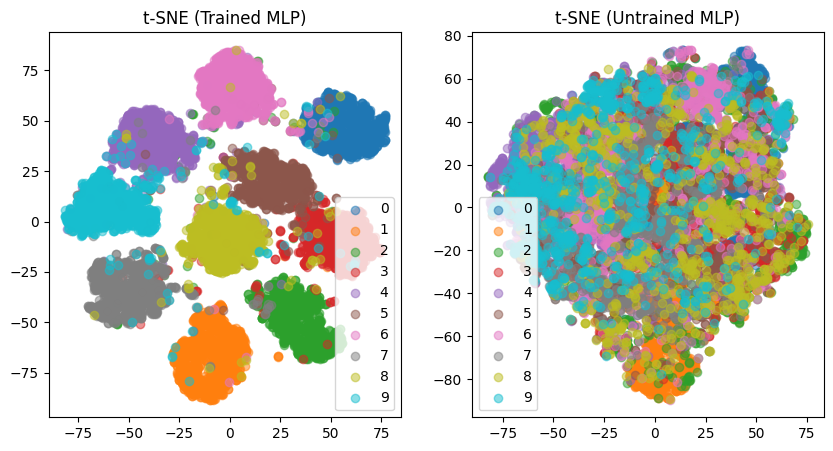

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE for the trained model
tsne_trained = TSNE(n_components=2, random_state=42)
tsne_results_trained = tsne_trained.fit_transform(activations_trained)

# t-SNE for the untrained model
tsne_untrained = TSNE(n_components=2, random_state=42)
tsne_results_untrained = tsne_untrained.fit_transform(activations_untrained)

# Plot the t-SNE results for the trained model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for digit in range(10):
    indices = labels_trained == digit
    plt.scatter(tsne_results_trained[indices, 0], tsne_results_trained[indices, 1], label=str(digit), alpha=0.5)
plt.legend()
plt.title("t-SNE (Trained MLP)")

# Plot the t-SNE results for the untrained model
plt.subplot(1, 2, 2)
for digit in range(10):
    indices = labels_untrained == digit
    plt.scatter(tsne_results_untrained[indices, 0], tsne_results_untrained[indices, 1], label=str(digit), alpha=0.5)
plt.legend()
plt.title("t-SNE (Untrained MLP)")
plt.show()

After training, the t-SNE plot for the 20-neuron layer shows clusters corresponding to each digit class. This clustering is evidence that the MLP can learn meaningful representations for each class.

The t-SNE plot for the untrained model shows a more scattered arrangement with no distinct clusters. 

Without training, the layer doesn’t learn class-specific features, so there’s no clear separation between different digit classes in the t-SNE visualization.

Training helps the model to develop representations in the hidden layers that cluster similar classes, suggesting that the MLP's internal layers can learn features to make class distinctions.

### Fashion MNIST dataset

In [22]:
import torchvision
import torch.utils.data

# Define the transformation to convert images to PyTorch tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load Fashion-MNIST dataset
fashion_mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashion_mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

fashion_test_loader = torch.utils.data.DataLoader(dataset=fashion_mnist_test, batch_size=64, shuffle=False)
fashion_train_loader = torch.utils.data.DataLoader(dataset=fashion_mnist_train, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:14<00:00, 1842840.86it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 211890.82it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1885376.49it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [23]:
# Flatten the images for sklearn MLP
X_train_fashion = train_dataset.data.numpy().reshape((len(fashion_mnist_train), -1))
y_train_fashion = train_dataset.targets.numpy()
X_test_fashion = test_dataset.data.numpy().reshape((len(fashion_mnist_test), -1))
y_test_fashion = test_dataset.targets.numpy()

# Standardize features
scaler = StandardScaler()
X_train_scaled_fashion = scaler.fit_transform(X_train_fashion)
X_test_scaled_fashion = scaler.transform(X_test_fashion)

In [24]:
print(len(y_train_fashion))
print(len(y_test_fashion))

60000
10000


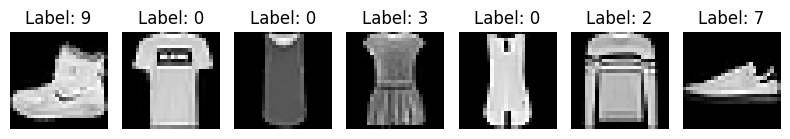

In [25]:
fig, axs = plt.subplots(1, 7, figsize=(8, 10))
for i in range(7):
    image, label = fashion_mnist_train[i]
    axs[i].imshow(image.squeeze(), cmap='gray')
    axs[i].set_title(f'Label: {label}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [36]:
activations_fashion = []
predictions = []
labels_fashion = []

with torch.no_grad():
    for images, labels in fashion_test_loader:
        outputs, layer2_output = model_30_20(images)  # Use trained MNIST model
        _, predicted = torch.max(outputs, 1)
        activations_fashion.append(layer2_output.numpy())
        predictions.append(predicted.numpy())
        labels_fashion.append(labels.numpy())

activations_fashion = np.concatenate(activations_fashion)
predictions = np.concatenate(predictions)
labels_fashion = np.concatenate(labels_fashion)

accuracy = np.mean(predictions == labels_fashion) * 100
print(f'Prediction Accuracy on Fashion-MNIST: {accuracy:.2f}%')

Prediction Accuracy on Fashion-MNIST: 4.97%


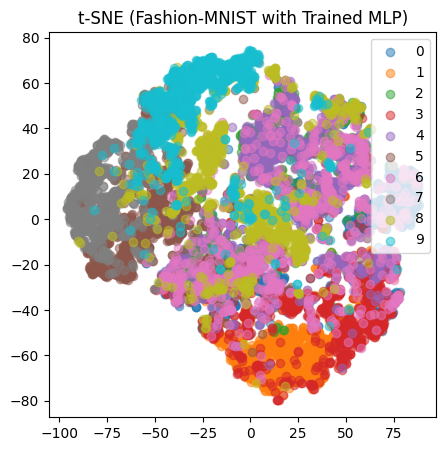

In [27]:
# t-SNE for Fashion-MNIST
tsne_fashion = TSNE(n_components=2, random_state=42)
tsne_results_fashion = tsne_fashion.fit_transform(activations_fashion)

# Plot the t-SNE results for Fashion-MNIST
plt.figure(figsize=(5, 5))
for label in range(10):
    indices = labels_fashion == label
    plt.scatter(tsne_results_fashion[indices, 0], tsne_results_fashion[indices, 1], label=str(label), alpha=0.5)
plt.legend()
plt.title("t-SNE (Fashion-MNIST with Trained MLP)")
plt.show()

The trained MLP performs poorly when tested on Fashion-MNIST. This is expected, as the MLP was specifically trained on the digit-based MNIST dataset, not on images of fashion items. The lack of relevant features results in suboptimal accuracy and confused class predictions.

The t-SNE plot of the second layer for Fashion-MNIST shows a less structured pattern compared to MNIST. 

The scattered nature of Fashion-MNIST embeddings indicates that the MLP’s learned representations are highly dataset-specific and not generalized for other types of images.